#### ĐỒ ÁN - TUTORIAL MADE BY PHẠM NGUYỄN CAO TRIỀU - 22207123<br>
-------------------------------------------------------------------------
# <center>NHẬN DIỆN KHUÔN MẶT VÀ ÁP DỤNG TỔNG NHÂN CHẬP VÀO XỬ LÝ ẢNH </center><br>

#### Mục đích:
> * Biết cách mở ảnh/webcam để hiện file nhằm xử lí ảnh 
> * Thực hiện các thay đổi thông số để quá trình chạy ổn định  <br>

Thêm thư viện vào project

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Phần 1: Hiển thị file <br>
1a. File ảnh <br>
(với mỗi chương trình đều viết lại toàn bộ từ thư viện cho tới hàm)<br>
1.1 đọc ảnh

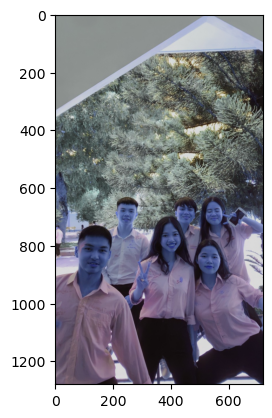

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# đọc ảnh bằng cách truy cập tới ảnh bằng hàm imread của cv2
image = cv2.imread('group.jpg')
# show ảnh ra
plt.imshow(image)

- Nếu ảnh "group" ở thư mục con kiểu như DO_aN thì mình truy cập đến ảnh như trên <br>
- Còn nếu ảnh ở thư mục hệ thống và không có ở bất kì thư mục nhỏ nào thì mình truy cập như sau:<br>
image = cv2.imread('group.jpg') <br>
- Vì ảnh đọc được từ file bằng cv2.imread sẽ làm đảo thứ tự kênh màu
- Thông thường ảnh trong file màu sẽ có thứ tự kênh màu là Red Green Blue nhưng hàm cv2.imread lại đọc ảnh ở thứ tự sắp xếp đảo lại là Blue Green Red nên dưới đây mình cần 1 hàm để convert ảnh lại đúng kênh. 

1.2. convert lại kênh màu cho chính xác<br>

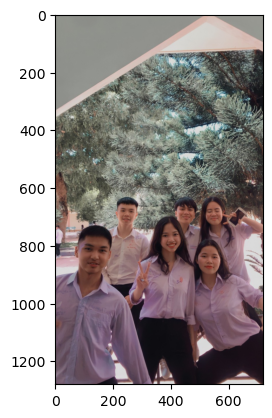

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# đọc ảnh bằng cách truy cập tới ảnh bằng hàm imread của cv2
image = cv2.imread('group.jpg')
image_cvt = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show ảnh ra
plt.imshow(image_cvt)


Phần 2: Xác định khuôn mặt<br>
1a. File ảnh<br>
1.1 Xác định thủ công

Bước 1: Xác định bằng cách so sánh điểm giống nhau của 2 ảnh <br>

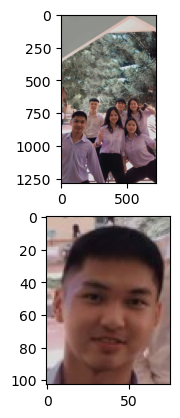

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# đọc ảnh bằng cách truy cập tới ảnh bằng hàm imread của cv2
image = cv2.imread('group.jpg')
# đặt lại image_cvt -> anh_goc
anh_goc = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_face = cv2.imread('Face_Trieu.jpg')
mat_Trieu = cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB)
# show ảnh ra
plt.subplot(2, 1, 1)
plt.imshow(anh_goc)
plt.subplot(2, 1, 2)
plt.imshow(mat_Trieu)

Bước 2: Thực hiện nhận diện khuôn mặt <br>
- Vì là nhận diện thủ công thay vì dùng hàm tuy là có sử dụng các hàm phân tích khác nhau của thư viện cv2 nhưng chung quy lại là chưa ổn định và không chính xác<br>
- Bên cạnh đó việc ảnh mat_Trieu chưa được rõ nét cũng làm quá trình nhận diện không chính xác hơn nửa thông qua kết quả của của Template có thể thấy độ tương đồng cao của nhiều khuôn mặt làm giảm khả năng nhận diện

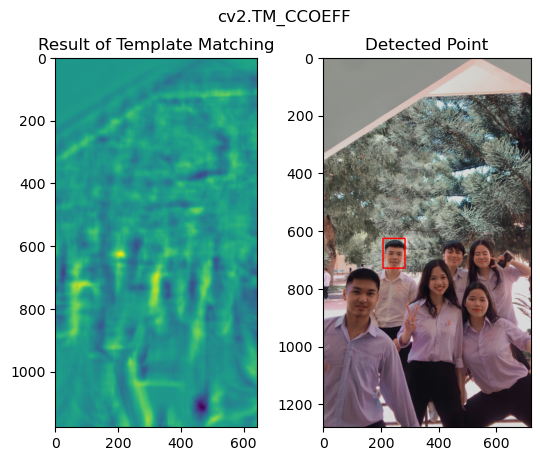

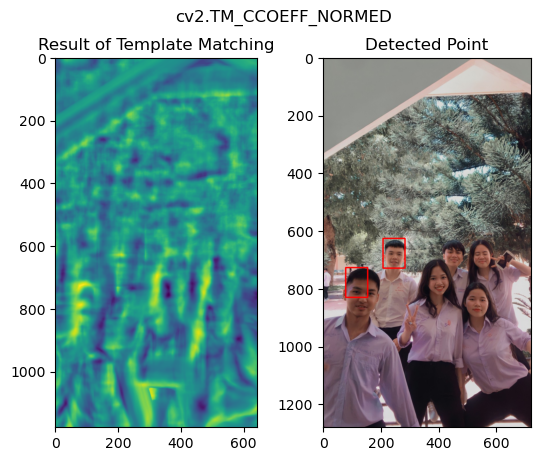

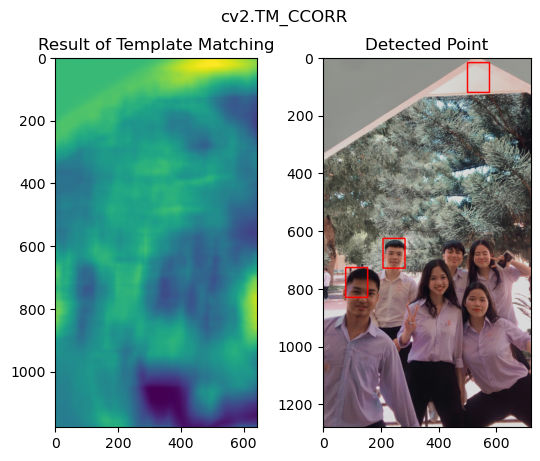

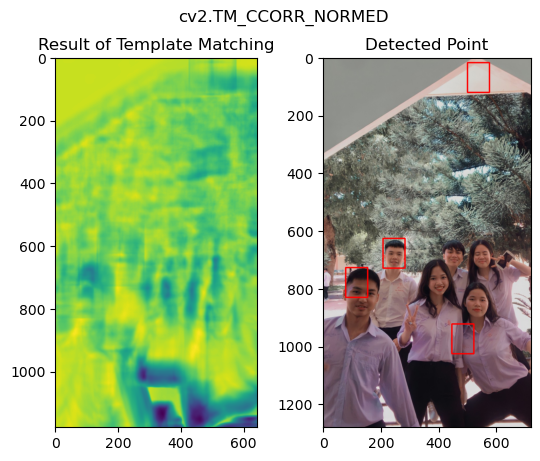

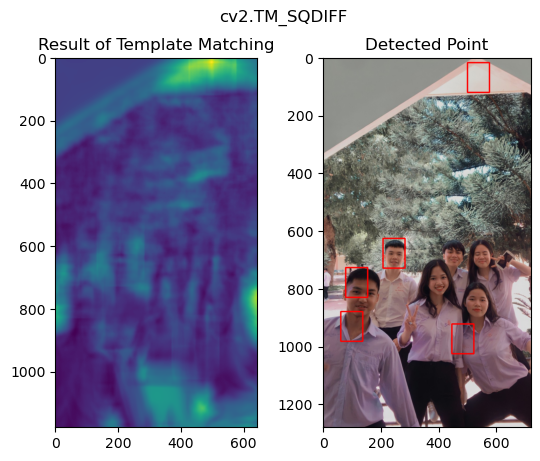

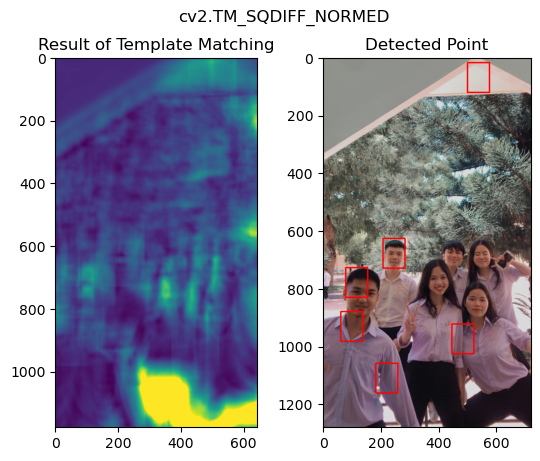

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# đọc ảnh bằng cách truy cập tới ảnh bằng hàm imread của cv2
image = cv2.imread('group.jpg')
# đặt lại image_cvt -> anh_goc
anh_goc = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_face = cv2.imread('Face_Trieu.jpg')
mat_Trieu = cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB)
height, width,channels = mat_Trieu.shape
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:   
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(anh_goc,mat_Trieu,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(anh_goc,top_left, bottom_right, 255, 3)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(anh_goc)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

Vậy khi nhận diện ở một bức ảnh chỉ có 1 người thì liệu có xảy ra sai số không? <br>

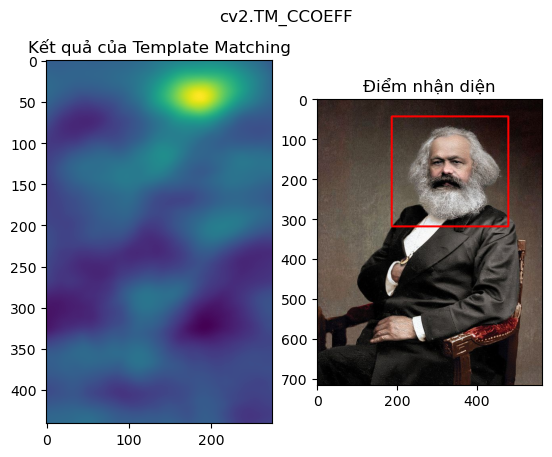

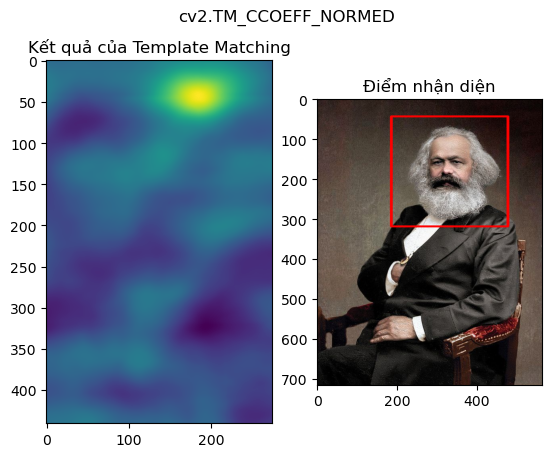

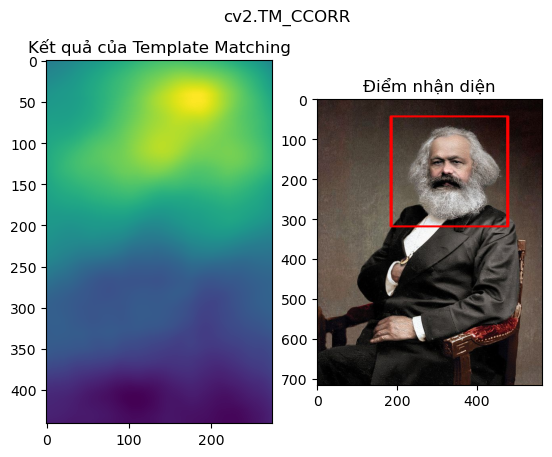

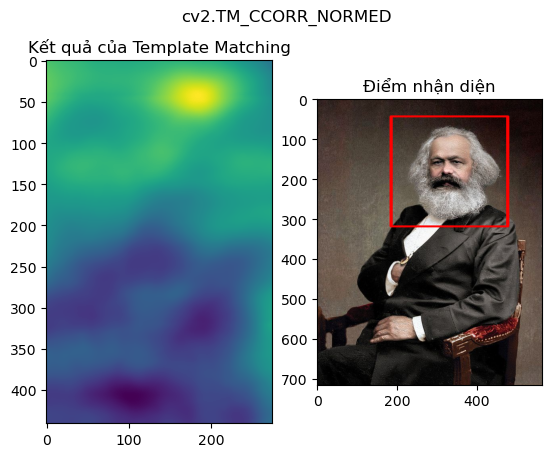

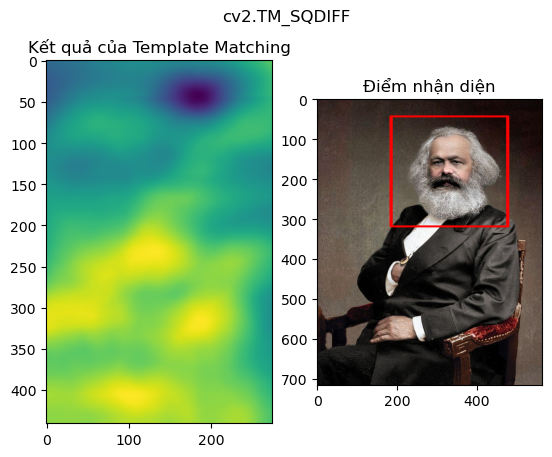

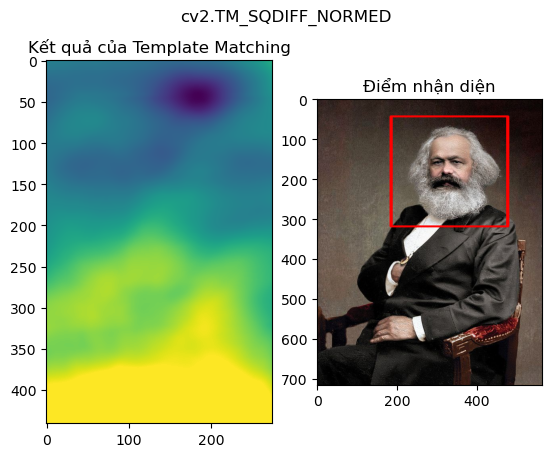

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# đọc ảnh bằng cách truy cập tới ảnh bằng hàm imread của cv2
image = cv2.imread('Tumblr.jpg')
# đặt lại image_cvt -> anh_goc
anh_goc = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_face = cv2.imread('Tumblr_face.jpg')
mat_Trieu = cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB)
height, width,channels = mat_Trieu.shape
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:   
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(anh_goc,mat_Trieu,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(anh_goc,top_left, bottom_right, 255, 3)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Kết quả của Template Matching')
    
    plt.subplot(122)
    plt.imshow(anh_goc)
    plt.title('Điểm nhận diện')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

Vậy cách nào để tối ưu và chính xác khi nhiều người trong 1 ảnh <br>
- Lúc này ta sử dụng file haarcascade <br>

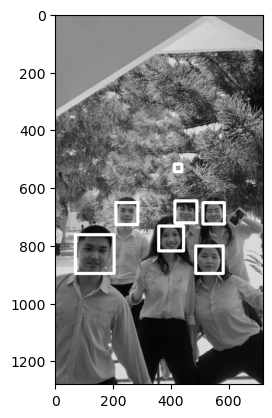

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# đọc ảnh bằng cách truy cập tới ảnh bằng hàm imread của cv2
image = cv2.imread('group.jpg',0)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
result = detect_face(image)
plt.imshow(result,cmap='gray')

Phần 3: Hàm chọn <br>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sharpen = [0, -1, 0, -1, 5, -1, 0, -1, 0]

blur = [0.0625, 0.125, 0.0625, 0.125, 0.25, 0.125, 0.0625, 0.125, 0.0625]

outline = [-1, -1, -1, -1, 8, -1, -1, -1, -1]

emboss = [-2, -1, 0, -1, 1, 1, 0, 1, 2]

identity = [0, 0, 0, 0, 1, 0, 0, 0, 0]


def choose_kernel(choice):
    if choice == '0':
        return sharpen
    elif choice == '1':
        return blur
    elif choice == '2':
        return outline
    elif choice == '3':
        return emboss
    else:
        print("Không có lựa chọn đó. Kernel sẽ đưa về dạng Identity")
        return identity

def bo_loc():
    print("Chọn 0 cho Sharpen")
    print("Chọn 1 cho Blur")
    print("Chọn 2 cho Outline")
    print("Chọn 3 cho Emboss")
    choice = input("Mời chọn: ")
    return choose_kernel(choice)

kernel = bo_loc()
kernel_name = str(kernel).split()[0][1:]
print(f"Selected kernel ({kernel_name}):")
print(kernel)

Chọn 0 cho Sharpen
Chọn 1 cho Blur
Chọn 2 cho Outline
Chọn 3 cho Emboss


Mời chọn:  0


Selected kernel (0,):
[0, -1, 0, -1, 5, -1, 0, -1, 0]


Phần 4: Nhân chập 2D<br>
- Cho dễ hình dung thì nếu ở trên lớp mình nhân chập dãy x dãy thì ở đây 2D là mình nhân ma trận với ma trận <br>

1.1. Chuyển đổi dãy sang ma trận <br>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

arr_identity = [0, 0, 0, 0, 1, 0, 0, 0, 0]
identity = np.array(arr_identity).reshape(3, 3).astype(np.float32)

identity

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]], dtype=float32)

1.2. Chuyển từ ma trận sang dãy <br>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = np.ones((3,3)) # 3x3 = 9

day_a = np.array(a).reshape(1, 9).astype(np.float32)
# reshape(a,b) -> a là số dòng, b là số cột
day_a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

1.3. Nhân chập 2D trên 1 bức ảnh <br>

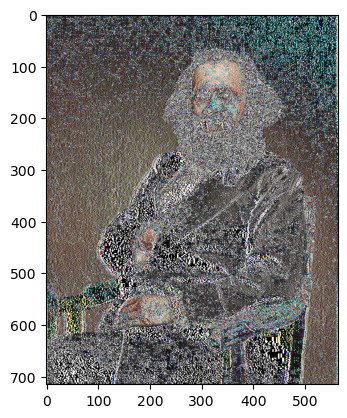

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

arr_sharpen = [0, -1, 0, -1, 5, -1, 0, -1, 0]
sharpen = np.array(arr_sharpen).reshape(3, 3).astype(np.float32)

image = cv2.imread('Tumblr.jpg')
frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fix_channel_r = np.convolve(frame[:,:,0].flatten(), sharpen.flatten(), mode='same').reshape(frame[:,:,0].shape)
fix_channel_g = np.convolve(frame[:,:,1].flatten(), sharpen.flatten(), mode='same').reshape(frame[:,:,1].shape)
fix_channel_b = np.convolve(frame[:,:,2].flatten(), sharpen.flatten(), mode='same').reshape(frame[:,:,2].shape)
fix = np.stack((fix_channel_r, fix_channel_g, fix_channel_b), axis=2).astype(np.uint8)

plt.imshow(fix)